In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('new clean')
desc=pd.read_csv('LCDataDictionary.csv')

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
for i in range(desc.shape[0]):
    if desc.loc[i]['LoanStatNew'] not in df:
        desc.drop(index=i, inplace=True)

In [6]:
desc.reset_index(drop=True, inplace=True)

In [7]:
desc

LoanStatNew                                        Description
0                addr_state  The state provided by the borrower in the loan...
1                annual_inc  The self-reported annual income provided by th...
2   collection_recovery_fee                     post charge off collection fee
3               delinq_2yrs  The number of 30+ days past-due incidences of ...
4                       dti  A ratio calculated using the borrower’s total ...
5          earliest_cr_line  The month the borrower's earliest reported cre...
6                emp_length  Employment length in years. Possible values ar...
7                 emp_title  The job title supplied by the Borrower when ap...
8           fico_range_high  The upper boundary range the borrower’s FICO a...
9            fico_range_low  The lower boundary range the borrower’s FICO a...
10              funded_amnt  The total amount committed to that loan at tha...
11          funded_amnt_inv  The total amount committed by investors for th...
12                    grade                             LC assigned loan grade
13           home_ownership  The home ownership status provided by the borr...
14                       id      A unique LC assigned ID for the loan listing.
15           inq_last_6mths  The number of inquiries in past 6 months (excl...
16              installment  The monthly payment owed by the borrower if th...
17                 int_rate                          Interest Rate on the loan
18                  issue_d                The month which the loan was funded
19       last_credit_pull_d  The most recent month LC pulled credit for thi...
20     last_fico_range_high  The upper boundary range the borrower’s last F...
21      last_fico_range_low  The lower boundary range the borrower’s last F...
22          last_pymnt_amnt                 Last total payment amount received
23             last_pymnt_d                    Last month payment was received
24                loan_amnt  The listed amount of the loan applied for by t...
25              loan_status                         Current status of the loan
26                member_id   A unique LC assigned Id for the borrower member.
27                 open_acc  The number of open credit lines in the borrowe...
28                out_prncp  Remaining outstanding principal for total amou...
29            out_prncp_inv  Remaining outstanding principal for portion of...
30                  pub_rec                Number of derogatory public records
31     pub_rec_bankruptcies               Number of public record bankruptcies
32                  purpose  A category provided by the borrower for the lo...
33               recoveries                     post charge off gross recovery
34                revol_bal                     Total credit revolving balance
35               revol_util  Revolving line utilization rate, or the amount...
36                sub_grade                          LC assigned loan subgrade
37                     term  The number of payments on the loan. Values are...
38                    title            The loan title provided by the borrower
39                total_acc  The total number of credit lines currently in ...
40              total_pymnt  Payments received to date for total amount funded
41          total_pymnt_inv  Payments received to date for portion of total...
42            total_rec_int                          Interest received to date
43       total_rec_late_fee                         Late fees received to date
44          total_rec_prncp                         Principal received to date
45      verification_status  Indicates if income was verified by LC, not ve...
46                 zip_code  The first 3 numbers of the zip code provided b...

In [8]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599.0     5000.0       5000.0           4975.0   36 months   
1  1077430  1314167.0     2500.0       2500.0           2500.0   60 months   
2  1077175  1313524.0     2400.0       2400.0           2400.0   36 months   
3  1076863  1277178.0    10000.0      10000.0          10000.0   36 months   
4  1075358  1311748.0     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade  ... total_rec_int total_rec_late_fee  \
0   10.65%       162.87     B        B2  ...        863.16               0.00   
1   15.27%        59.83     C        C4  ...        435.17               0.00   
2   15.96%        84.33     C        C5  ...        605.67               0.00   
3   13.49%       339.31     C        C1  ...       2214.92              16.97   
4   12.69%        67.79     B        B5  ...       1055.27               0.00   

  recoveries  collection_recovery_fee last_pymnt_d last_pymnt_amnt  \
0       0.00                     0.00     Jan-2015          171.62   
1     117.08                     1.11     Apr-2013          119.66   
2       0.00                     0.00     Jun-2014          649.91   
3       0.00                     0.00     Jan-2015          357.48   
4       0.00                     0.00     Sep-2016           67.79   

  last_credit_pull_d last_fico_range_high last_fico_range_low  \
0           Sep-2016                744.0               740.0   
1           Sep-2016                499.0                 0.0   
2           Sep-2016                719.0               715.0   
3           Apr-2016                604.0               600.0   
4           Sep-2016                694.0               690.0   

  pub_rec_bankruptcies  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 47 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42350 entries, 0 to 42349
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       42350 non-null  int64  
 1   member_id                42350 non-null  float64
 2   loan_amnt                42350 non-null  float64
 3   funded_amnt              42350 non-null  float64
 4   funded_amnt_inv          42350 non-null  float64
 5   term                     42350 non-null  object 
 6   int_rate                 42350 non-null  object 
 7   installment              42350 non-null  float64
 8   grade                    42350 non-null  object 
 9   sub_grade                42350 non-null  object 
 10  emp_title                42350 non-null  object 
 11  emp_length               42350 non-null  object 
 12  home_ownership           42350 non-null  object 
 13  annual_inc               42350 non-null  float64
 14  verification_status   

In [10]:
df['id'].dtype

dtype('int64')

In [11]:
def int_rate_clean(i):
    return (i[:-1])

In [12]:
df['int_rate']=df['int_rate'].apply(int_rate_clean).astype(float)

In [13]:
def term_clean(i):
    return (i[0:3])

In [14]:
df['term']=df['term'].apply(term_clean).astype(int)

In [15]:
def revol_util_clean(i):
    return (i[:-1])

In [16]:
df['revol_util']=df['revol_util'].apply(revol_util_clean).astype(float)

In [17]:
df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  4.235000e+04  4.235000e+04  42350.000000  42350.000000   
mean   6.653378e+05  8.266770e+05  11109.211924  10840.211334   
std    2.188062e+05  2.788685e+05   7409.408311   7145.056871   
min    5.473400e+04  7.069400e+04    500.000000    500.000000   
25%    4.989700e+05  6.395432e+05   5200.000000   5100.000000   
50%    6.450115e+05  8.249430e+05   9800.000000   9600.000000   
75%    8.263058e+05  1.034498e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv          term      int_rate   installment  \
count     42350.000000  42350.000000  42350.000000  42350.000000   
mean      10162.262400     42.220165     12.158697    323.124979   
std        7130.080610     10.516469      3.707855    208.872033   
min           0.000000     36.000000      5.420000     15.670000   
25%        4964.045719     36.000000      9.620000    165.740000   
50%        8500.000000     36.000000     11.990000    278.410000   
75%       14000.000000     60.000000     14.720000    428.907500   
max       35000.000000     60.000000     24.590000   1305.190000   

         annual_inc           dti  ...  total_pymnt_inv  total_rec_prncp  \
count  4.235000e+04  42350.000000  ...     42350.000000     42350.000000   
mean   6.920405e+04     13.383605  ...     11338.436106      9696.172395   
std    6.413285e+04      6.723341  ...      9006.223240      7082.436964   
min    1.896000e+03      0.000000  ...         0.000000         0.000000   
25%    4.000000e+04      8.210000  ...      4845.325000      4499.990000   
50%    5.900000e+04     13.480000  ...      8993.635000      8000.000000   
75%    8.250000e+04     18.690000  ...     15560.585000     13500.000000   
max    6.000000e+06     29.990000  ...     58563.680000     35000.020000   

       total_rec_int  total_rec_late_fee    recoveries  \
count   42350.000000        42350.000000  42350.000000   
mean     2246.934821            1.514701     99.398091   
std      2585.997428            7.818819    715.725529   
min         3.540000            0.000000      0.000000   
25%       662.680000            0.000000      0.000000   
50%      1344.735000            0.000000      0.000000   
75%      2811.507500            0.000000      0.000000   
max     23823.750000          209.000000  29623.350000   

       collection_recovery_fee  last_pymnt_amnt  last_fico_range_high  \
count             42350.000000     42350.000000          42350.000000   
mean                 13.828583      2622.827748            689.676647   
std                 159.322243      4391.512252             79.694702   
min                   0.000000         0.000000              0.000000   
25%                   0.000000       213.315000            644.000000   
50%                   0.000000       531.460000            699.000000   
75%                   0.000000      3190.025000            744.000000   
max                7002.190000     36115.200000            850.000000   

       last_fico_range_low  pub_rec_bankruptcies  
count         42350.000000          42350.000000  
mean            676.960094              0.043778  
std             117.951024              0.205525  
min               0.000000              0.000000  
25%             640.000000              0.000000  
50%             695.000000              0.000000  
75%             740.000000              0.000000  
max             845.000000              2.000000  

[8 rows x 32 columns]

In [18]:
for i in df.columns:
    if df[i].dtype=='object':
        print(i)

grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
issue_d
loan_status
purpose
title
zip_code
addr_state
earliest_cr_line
last_pymnt_d
last_credit_pull_d


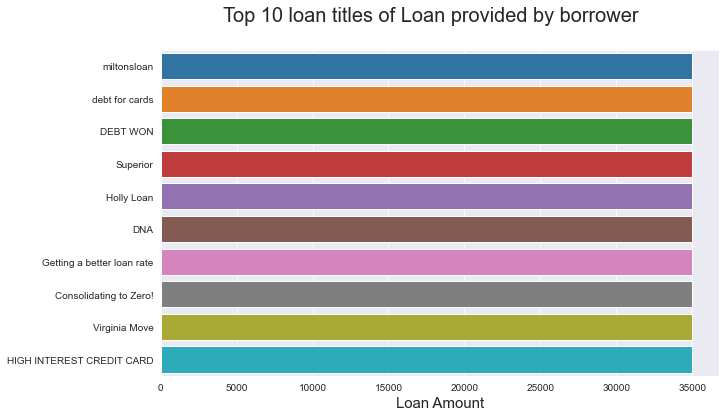

In [19]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.barplot(y='title',x='loan_amnt',data=df.groupby('title')['loan_amnt'].mean().sort_values(ascending=False).reset_index()[:10])
plt.suptitle("Top 10 loan titles of Loan provided by borrower",fontsize=20)
plt.xlabel('Loan Amount',fontsize=15)
plt.ylabel('')
plt.show()

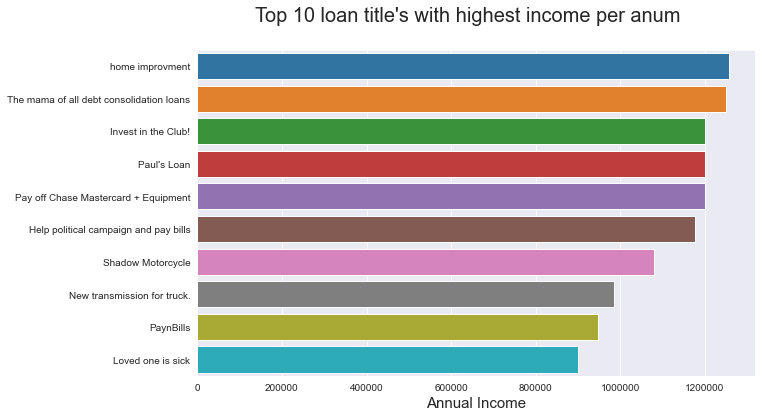

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(y='title',x='annual_inc',data=df.groupby('title')['annual_inc'].mean().sort_values(ascending=False).reset_index()[:10])
plt.suptitle("Top 10 loan title's with highest income per anum",fontsize=20)
plt.xlabel('Annual Income',fontsize=15)
plt.ticklabel_format(style='plain',axis='x')
plt.ylabel('')
plt.show()

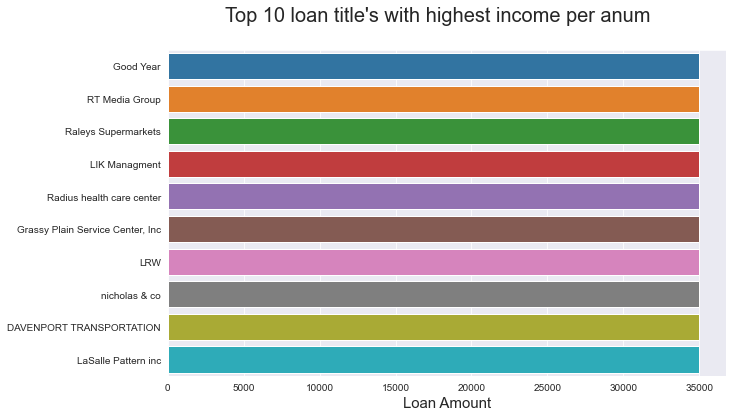

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(y='emp_title',x='loan_amnt',data=df.groupby('emp_title')['loan_amnt'].mean().sort_values(ascending=False).reset_index()[:10])
plt.suptitle("Top 10 loan title's with highest income per anum",fontsize=20)
plt.xlabel('Loan Amount',fontsize=15)
plt.ticklabel_format(style='plain',axis='x')
plt.ylabel('')
plt.show()

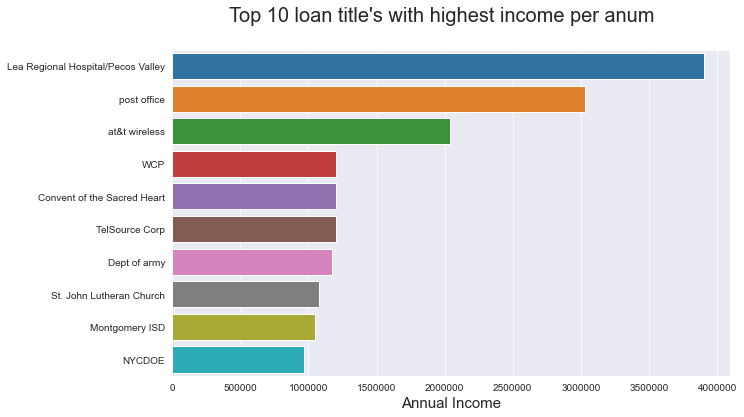

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(y='emp_title',x='annual_inc',data=df.groupby('emp_title')['annual_inc'].mean().sort_values(ascending=False).reset_index()[:10])
plt.suptitle("Top 10 loan title's with highest income per anum",fontsize=20)
plt.xlabel('Annual Income',fontsize=15)
plt.ticklabel_format(style='plain',axis='x')
plt.ylabel('')
plt.show()

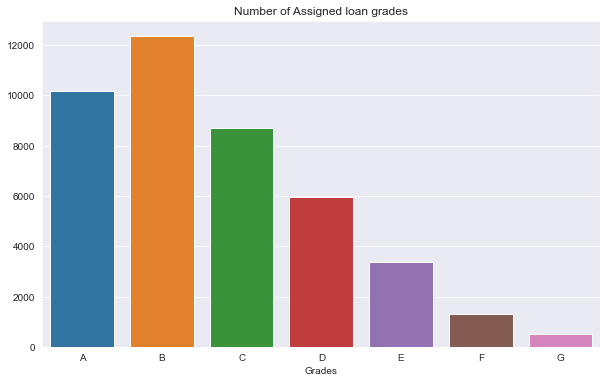

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='grade', data=df.sort_values('grade'))
plt.title("Number of Assigned loan grades")
plt.xlabel('Grades')
plt.ylabel('')
plt.show()

In [24]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

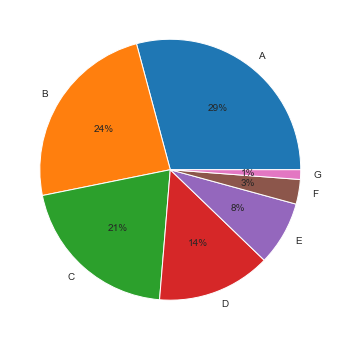

In [25]:
plt.figure(figsize=(12,6))
plt.pie(df['grade'].value_counts(),
        autopct='%.0f%%',
        labels=['A','B','C','D','E','F','G'])
plt.show()

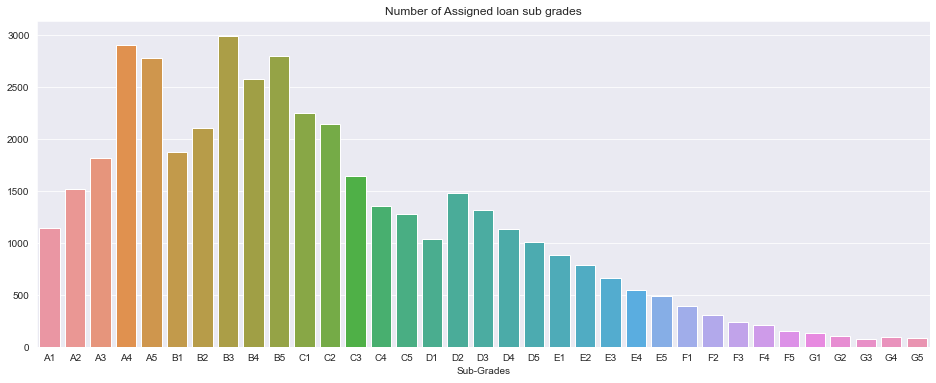

In [26]:
plt.figure(figsize=(16,6))
sns.countplot(x='sub_grade', data=df.sort_values('sub_grade'))
plt.title("Number of Assigned loan sub grades")
plt.xlabel('Sub-Grades')
plt.ylabel('')
plt.show()

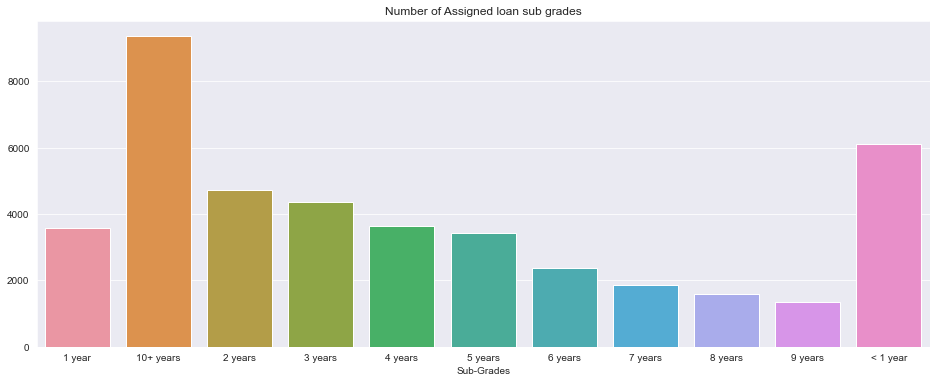

In [27]:
plt.figure(figsize=(16,6))
sns.countplot(x='emp_length', data=df.sort_values('emp_length'))
plt.title("Number of Assigned loan sub grades")
plt.xlabel('Sub-Grades')
plt.ylabel('')
plt.show()

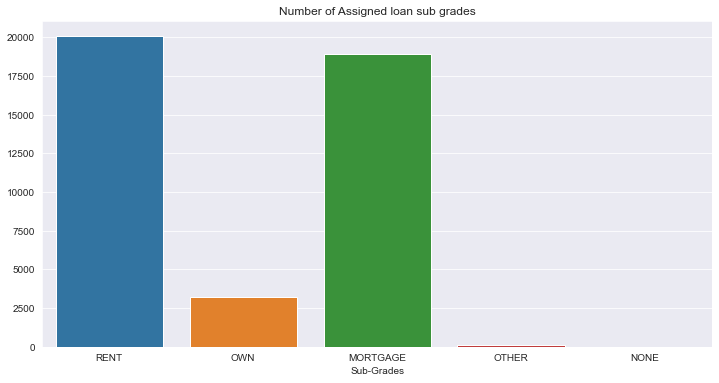

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x='home_ownership', data=df)
plt.title("Number of Assigned loan sub grades")
plt.xlabel('Sub-Grades')
plt.ylabel('')
plt.show()

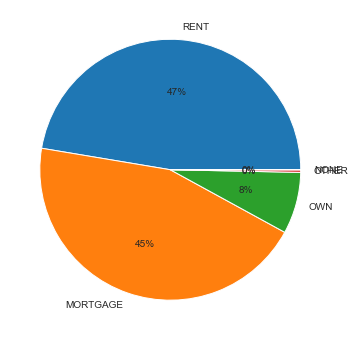

In [29]:
plt.figure(figsize=(12,6))
plt.pie(df['home_ownership'].value_counts(),
        autopct='%.0f%%',
        labels=['RENT','MORTGAGE','OWN','OTHER','NONE'])
plt.show()

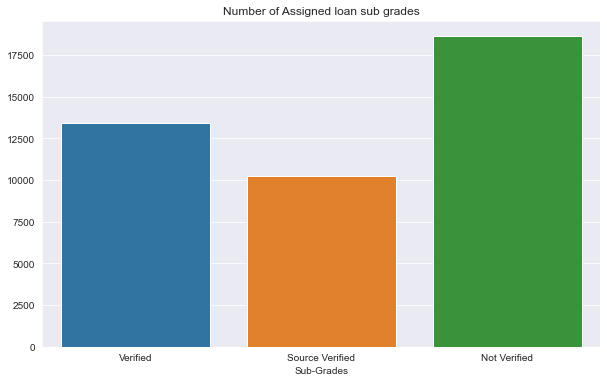

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x='verification_status', data=df)
plt.title("Number of Assigned loan sub grades")
plt.xlabel('Sub-Grades')
plt.ylabel('')
plt.show()

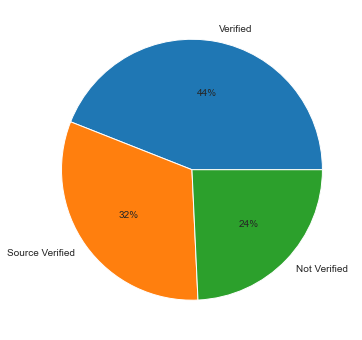

In [31]:
plt.figure(figsize=(12,6))
plt.pie(df['verification_status'].value_counts(),
        autopct='%.0f%%',
        labels=['Verified','Source Verified','Not Verified'])
plt.show()

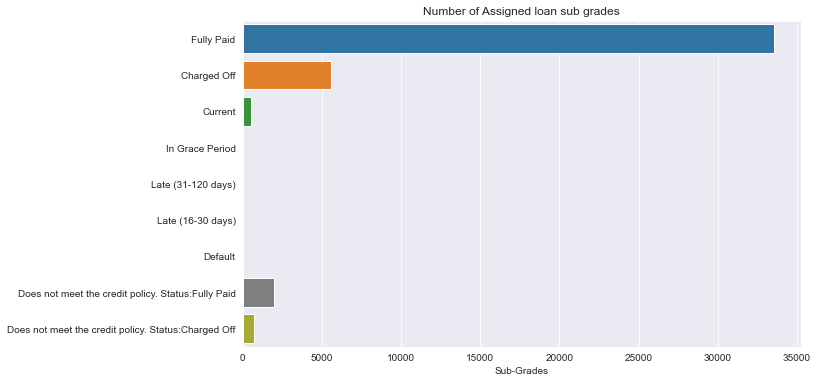

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(y='loan_status', data=df)
plt.title("Number of Assigned loan sub grades")
plt.xlabel('Sub-Grades')
plt.ylabel('')
plt.show()

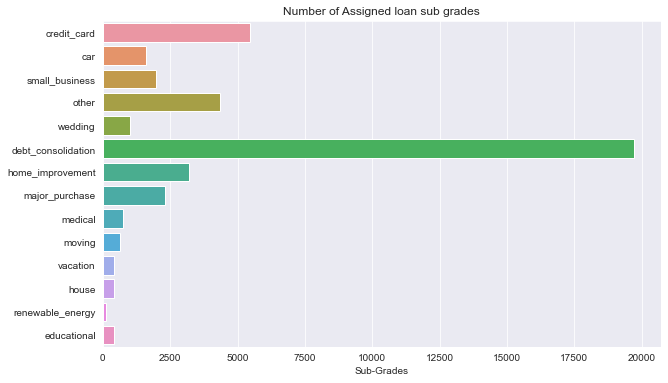

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(y='purpose', data=df)
plt.title("Number of Assigned loan sub grades")
plt.xlabel('Sub-Grades')
plt.ylabel('')
plt.show()

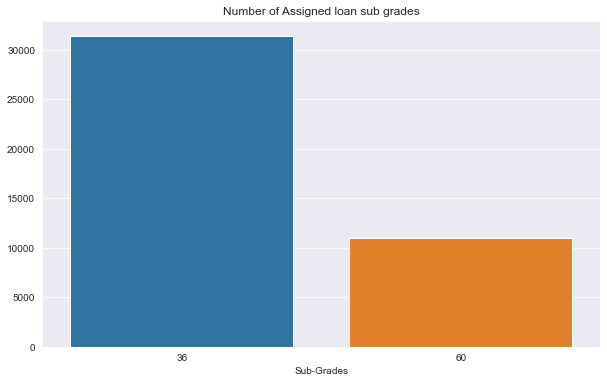

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x='term', data=df)
plt.title("Number of Assigned loan sub grades")
plt.xlabel('Sub-Grades')
plt.ylabel('')
plt.show()

# anual income

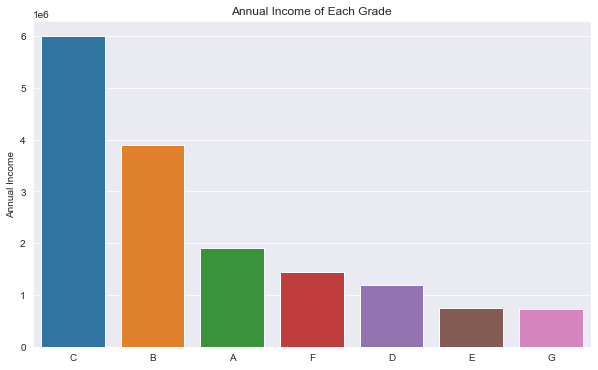

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='annual_inc', data=df.groupby('grade')['annual_inc'].max().sort_values(ascending=False).reset_index())
plt.title('Annual Income of Each Grade')
plt.xlabel('')
plt.ylabel('Annual Income')
plt.show()

In [36]:
for i in df.columns:
    if df[i].dtype!='object':
        print(i)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
annual_inc
dti
delinq_2yrs
fico_range_low
fico_range_high
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_amnt
last_fico_range_high
last_fico_range_low
pub_rec_bankruptcies


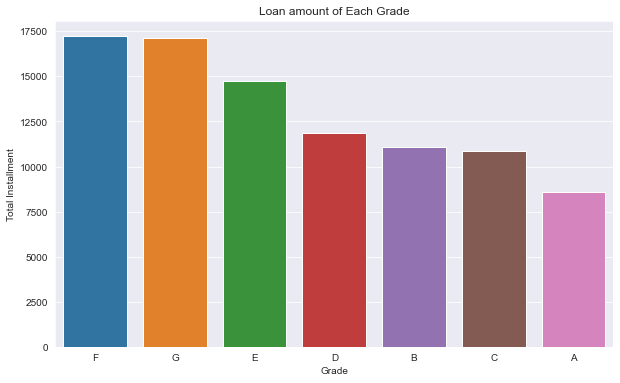

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='loan_amnt', data=df.groupby('grade')['loan_amnt'].mean().sort_values(ascending=False).reset_index())
plt.title('Loan amount of Each Grade')
plt.xlabel('Grade')
plt.ylabel('Total Installment')
plt.show()

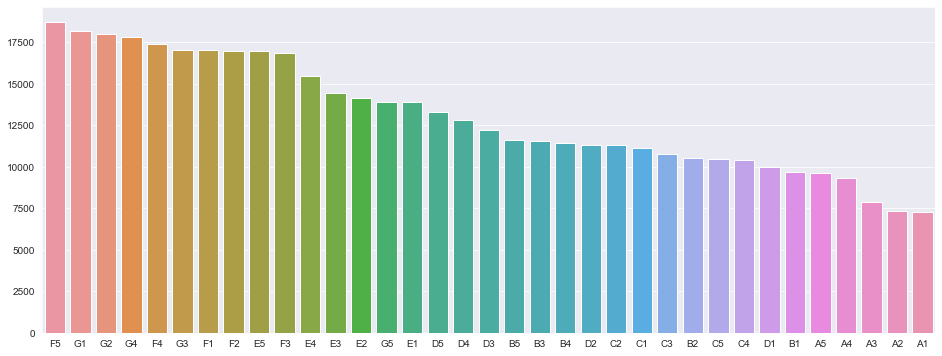

In [38]:
plt.figure(figsize=(16,6))
sns.barplot(x='sub_grade', y='loan_amnt', data=df.groupby('sub_grade')['loan_amnt'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

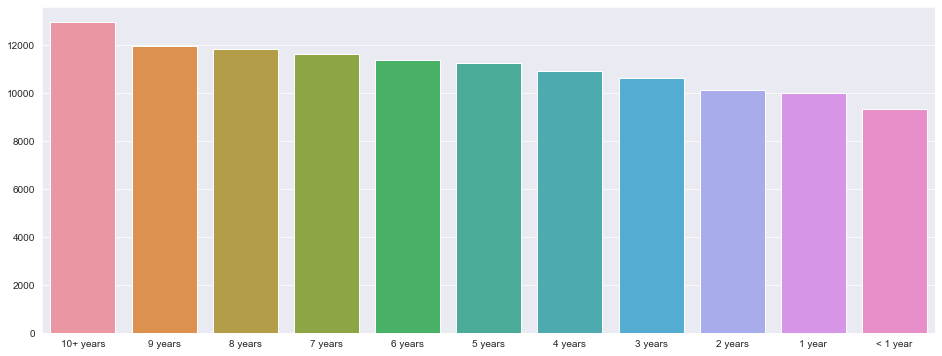

In [39]:
plt.figure(figsize=(16,6))
sns.barplot(x='emp_length', y='loan_amnt', data=df.groupby('emp_length')['loan_amnt'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

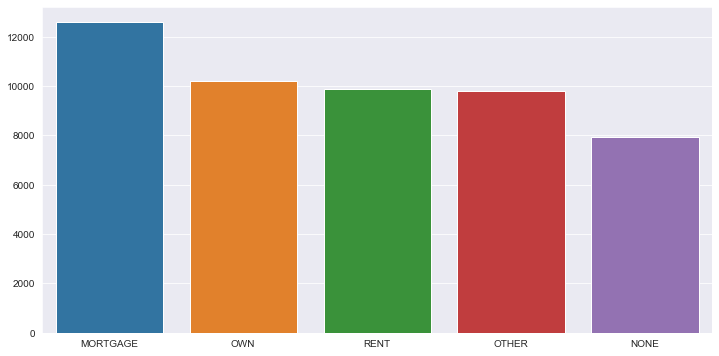

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x='home_ownership', y='loan_amnt', data=df.groupby('home_ownership')['loan_amnt'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

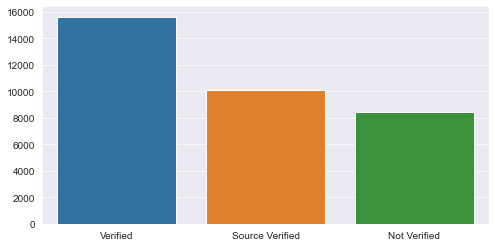

In [41]:
plt.figure(figsize=(8,4))
sns.barplot(x='verification_status', y='loan_amnt', data=df.groupby('verification_status')['loan_amnt'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

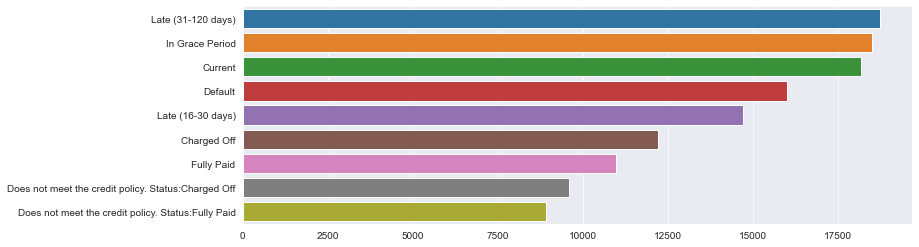

In [42]:
plt.figure(figsize=(12,4))
sns.barplot(y='loan_status', x='loan_amnt', data=df.groupby('loan_status')['loan_amnt'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

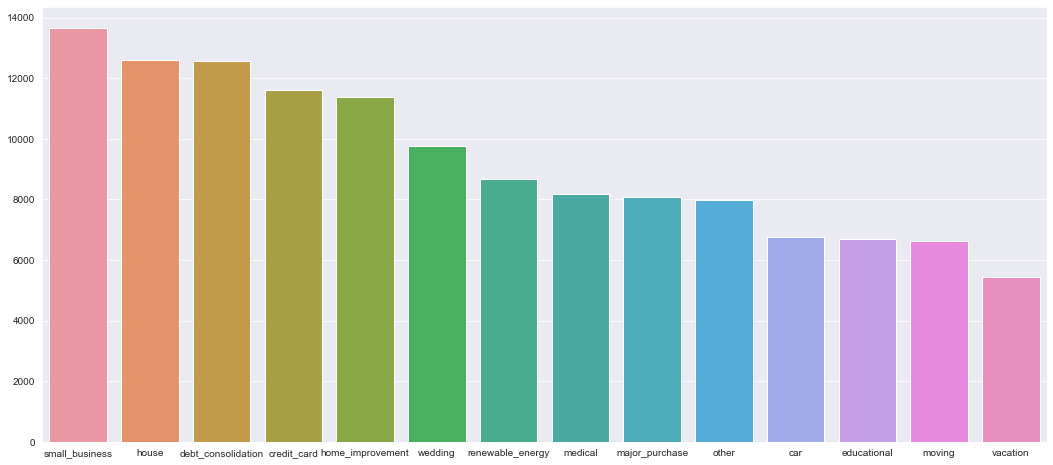

In [43]:
plt.figure(figsize=(18,8))
sns.barplot(x='purpose', y='loan_amnt', data=df.groupby('purpose')['loan_amnt'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [44]:
for i in df.columns:
    if df[i].dtype=='object':
        print(i)

grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
issue_d
loan_status
purpose
title
zip_code
addr_state
earliest_cr_line
last_pymnt_d
last_credit_pull_d


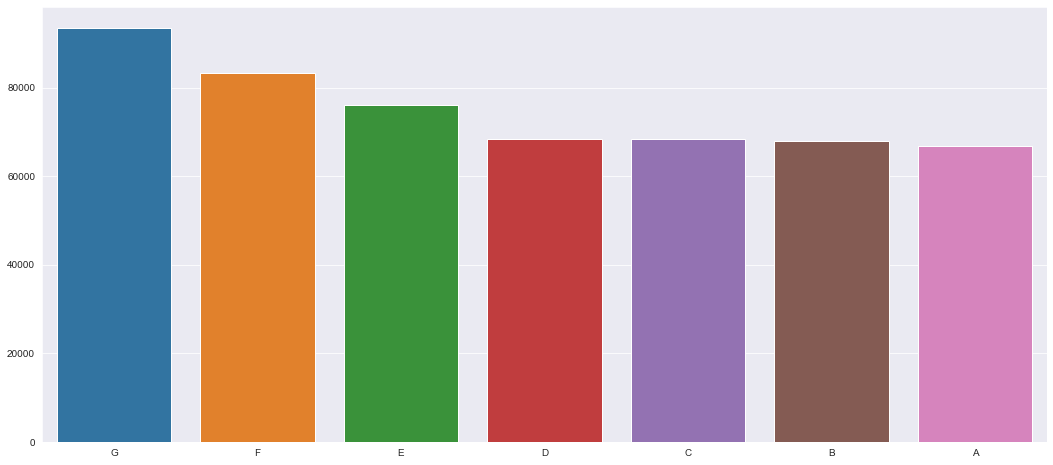

In [45]:
plt.figure(figsize=(18,8))
sns.barplot(x='grade', y='annual_inc', data=df.groupby('grade')['annual_inc'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

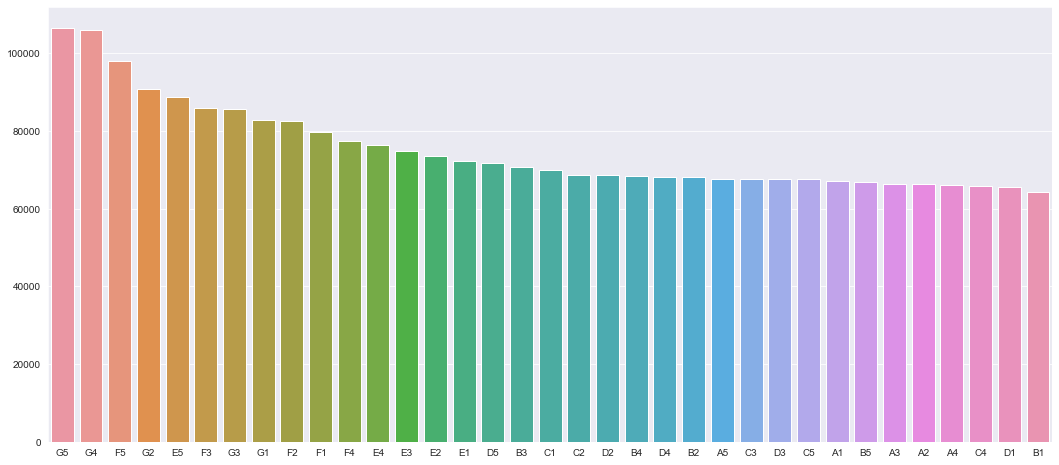

In [46]:
plt.figure(figsize=(18,8))
sns.barplot(x='sub_grade', y='annual_inc', data=df.groupby('sub_grade')['annual_inc'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

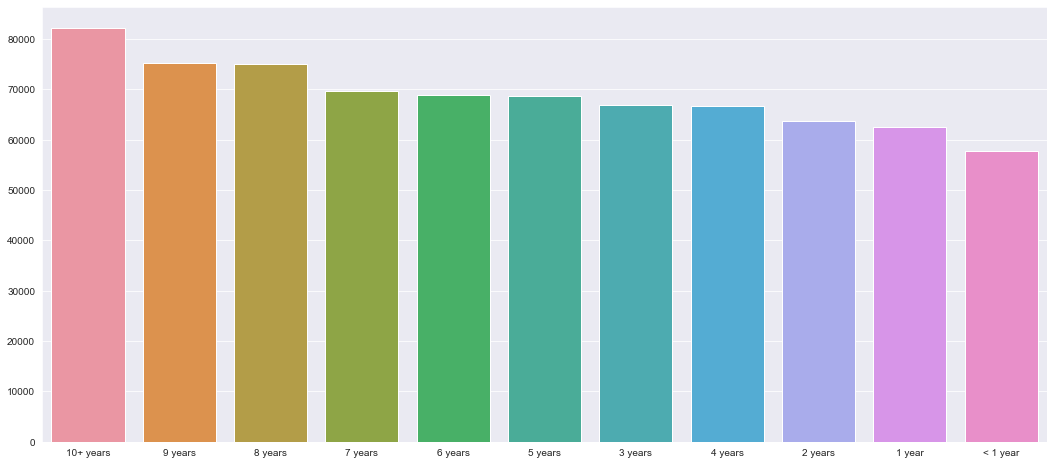

In [47]:
plt.figure(figsize=(18,8))
sns.barplot(x='emp_length', y='annual_inc', data=df.groupby('emp_length')['annual_inc'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

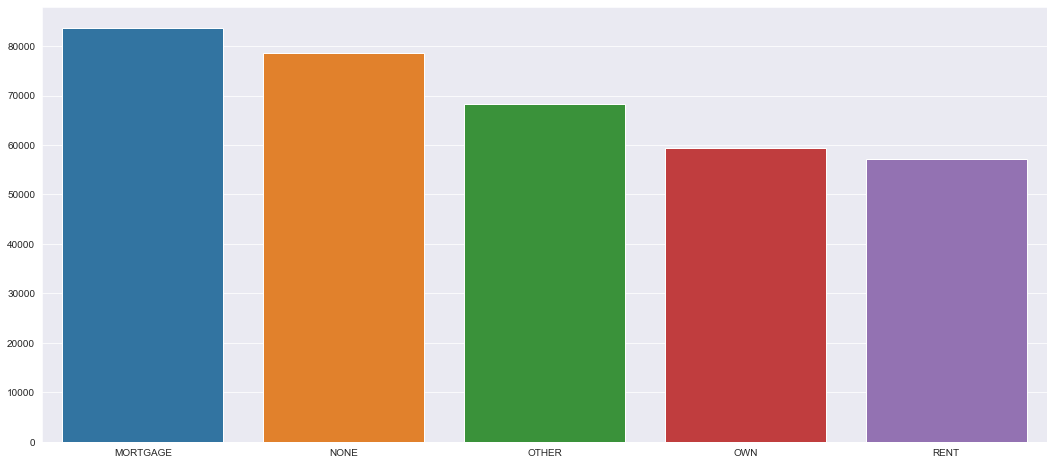

In [48]:
plt.figure(figsize=(18,8))
sns.barplot(x='home_ownership', y='annual_inc', data=df.groupby('home_ownership')['annual_inc'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

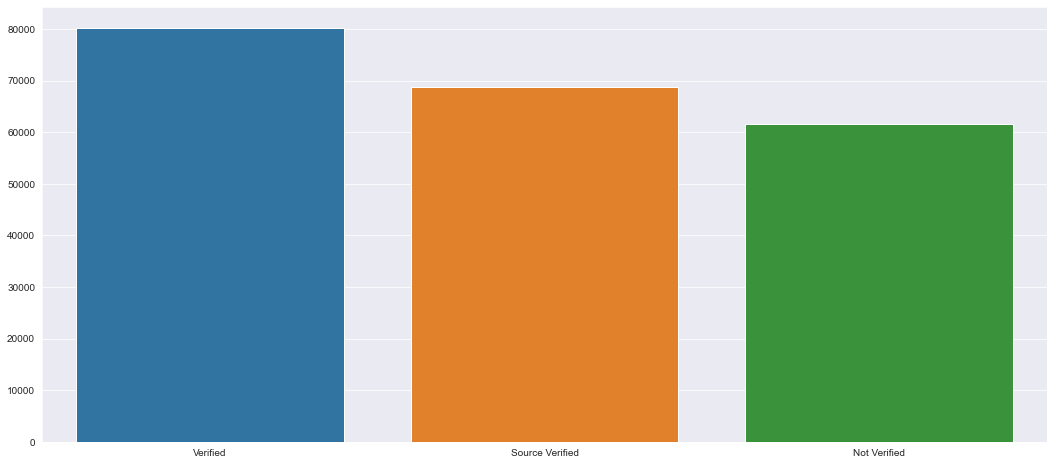

In [49]:
plt.figure(figsize=(18,8))
sns.barplot(x='verification_status', y='annual_inc', data=df.groupby('verification_status')['annual_inc'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

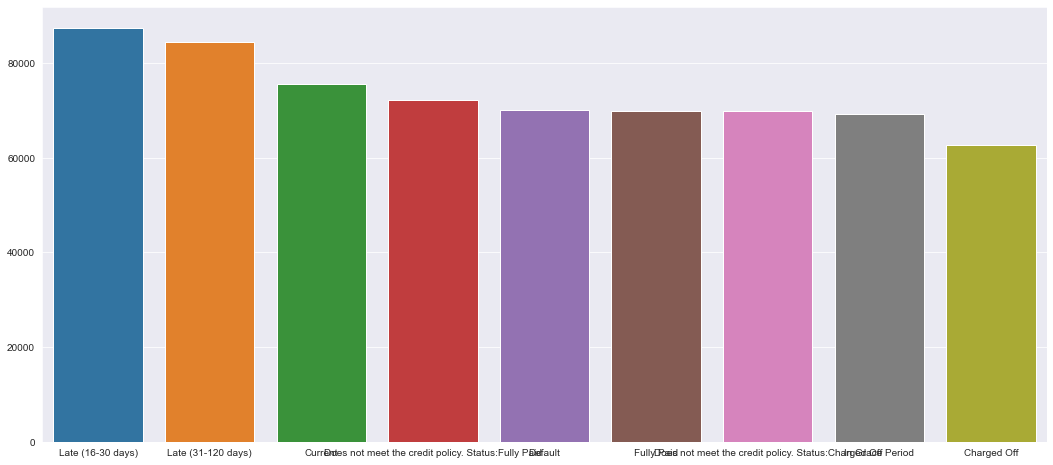

In [50]:
plt.figure(figsize=(18,8))
sns.barplot(x='loan_status', y='annual_inc', data=df.groupby('loan_status')['annual_inc'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

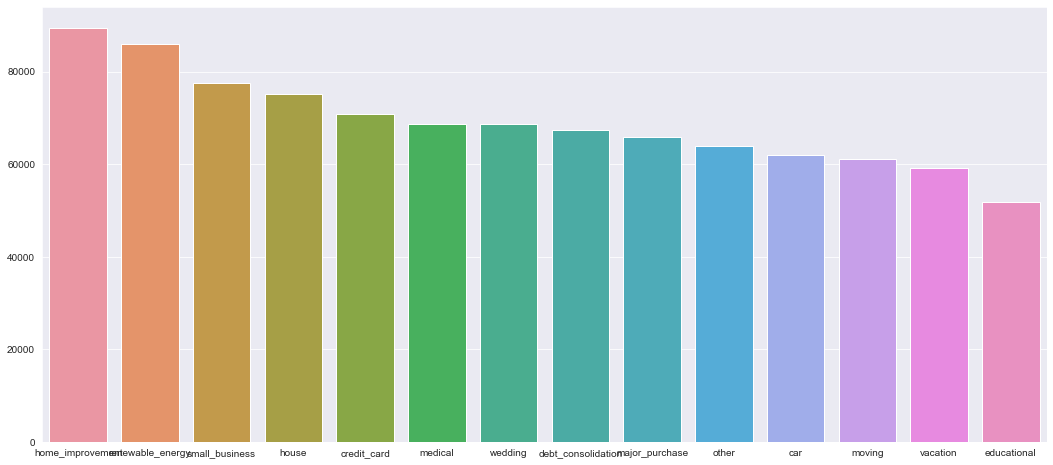

In [51]:
plt.figure(figsize=(18,8))
sns.barplot(x='purpose', y='annual_inc', data=df.groupby('purpose')['annual_inc'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [52]:
for i in df.columns:
    if df[i].dtype=='object':
        print(i)

grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
issue_d
loan_status
purpose
title
zip_code
addr_state
earliest_cr_line
last_pymnt_d
last_credit_pull_d


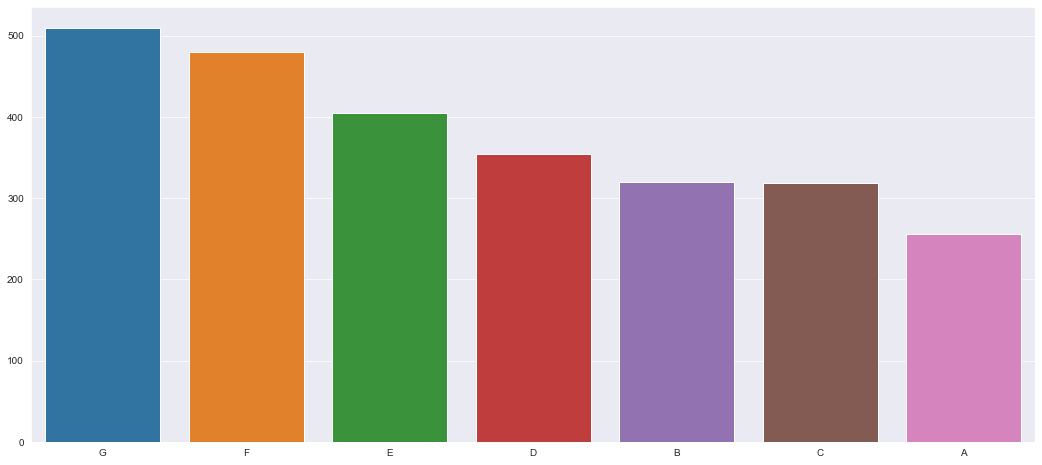

In [52]:
plt.figure(figsize=(18,8))
sns.barplot(x='grade', y='installment', data=df.groupby('grade')['installment'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

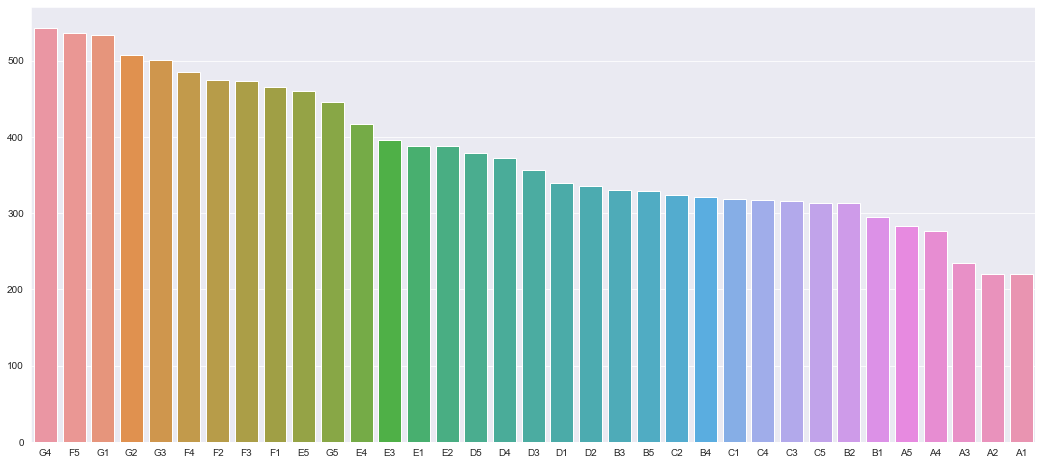

In [53]:
plt.figure(figsize=(18,8))
sns.barplot(x='sub_grade', y='installment', data=df.groupby('sub_grade')['installment'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

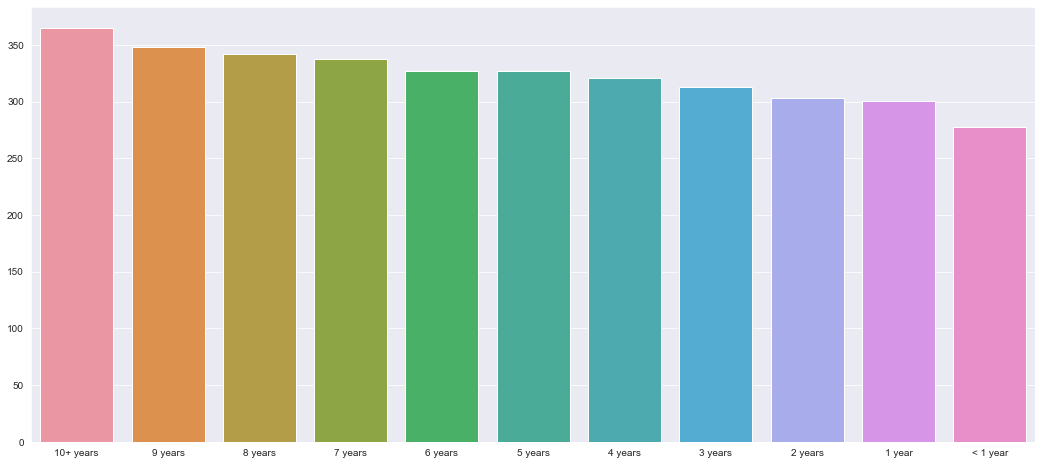

In [54]:
plt.figure(figsize=(18,8))
sns.barplot(x='emp_length', y='installment', data=df.groupby('emp_length')['installment'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

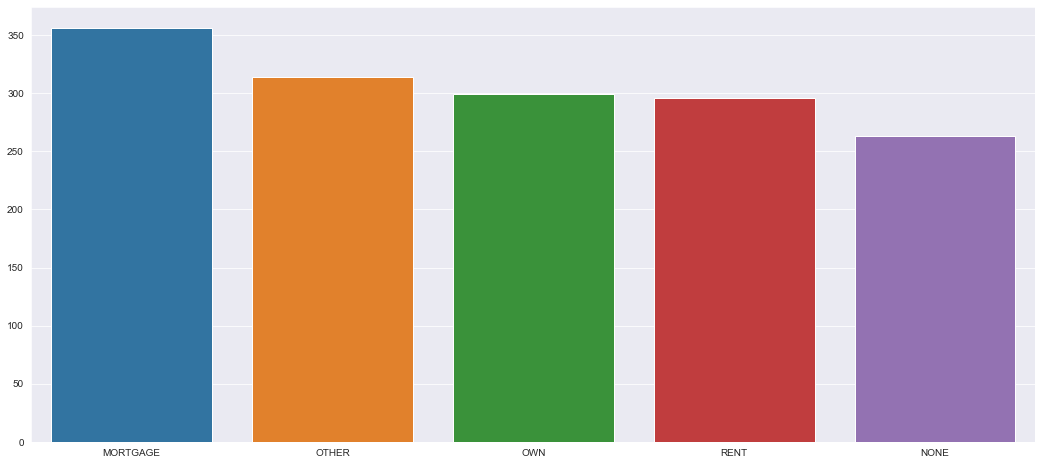

In [55]:
plt.figure(figsize=(18,8))
sns.barplot(x='home_ownership', y='installment', data=df.groupby('home_ownership')['installment'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

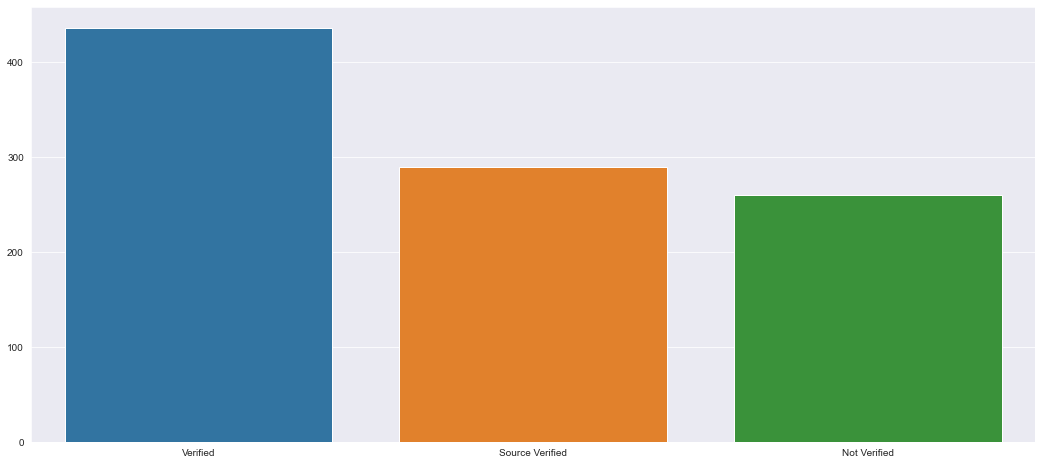

In [56]:
plt.figure(figsize=(18,8))
sns.barplot(x='verification_status', y='installment', data=df.groupby('verification_status')['installment'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

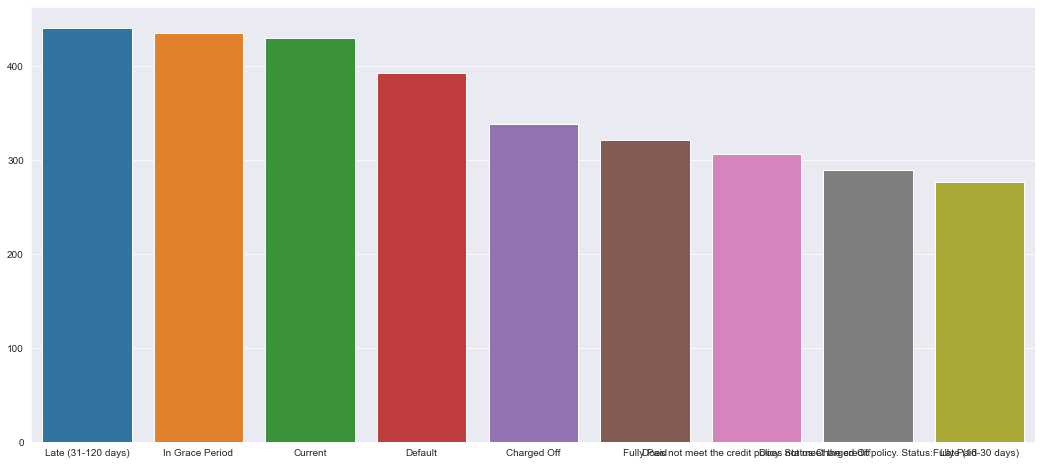

In [57]:
plt.figure(figsize=(18,8))
sns.barplot(x='loan_status', y='installment', data=df.groupby('loan_status')['installment'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

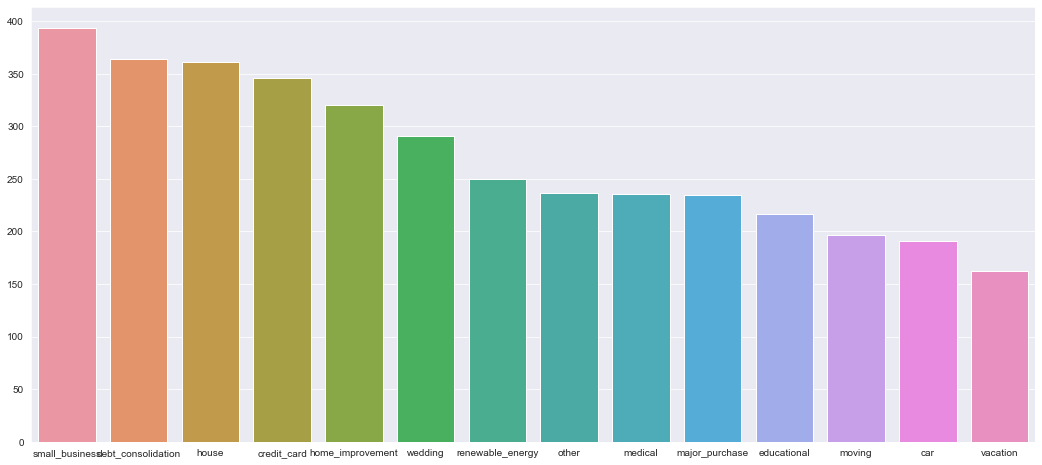

In [58]:
plt.figure(figsize=(18,8))
sns.barplot(x='purpose', y='installment', data=df.groupby('purpose')['installment'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [59]:
for i in df.columns:
    if df[i].dtype=='object':
        print(i)

grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
issue_d
loan_status
purpose
title
zip_code
addr_state
earliest_cr_line
last_pymnt_d
last_credit_pull_d


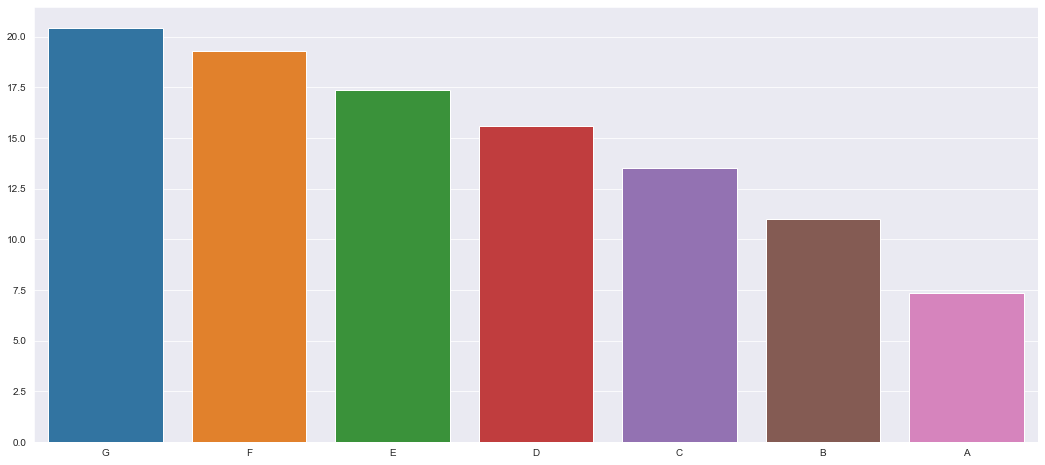

In [60]:
plt.figure(figsize=(18,8))
sns.barplot(x='grade', y='int_rate', data=df.groupby('grade')['int_rate'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

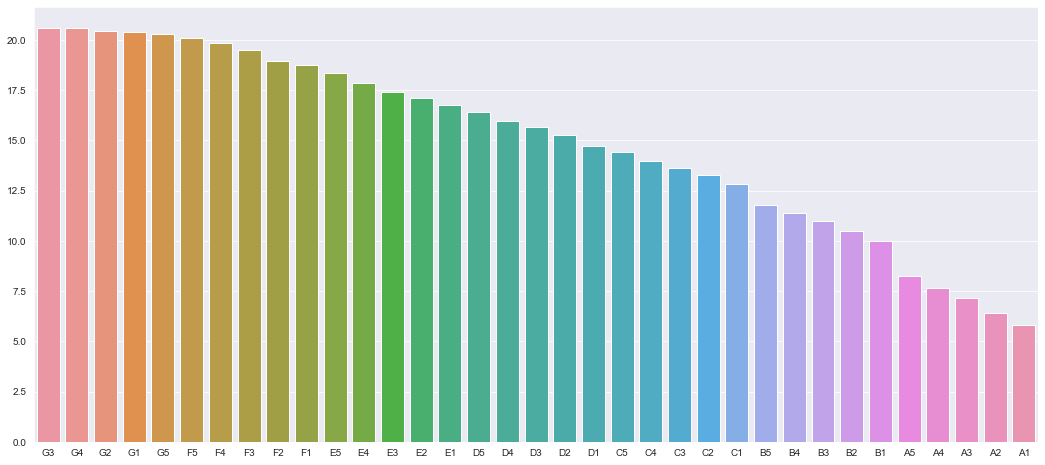

In [61]:
plt.figure(figsize=(18,8))
sns.barplot(x='sub_grade', y='int_rate', data=df.groupby('sub_grade')['int_rate'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

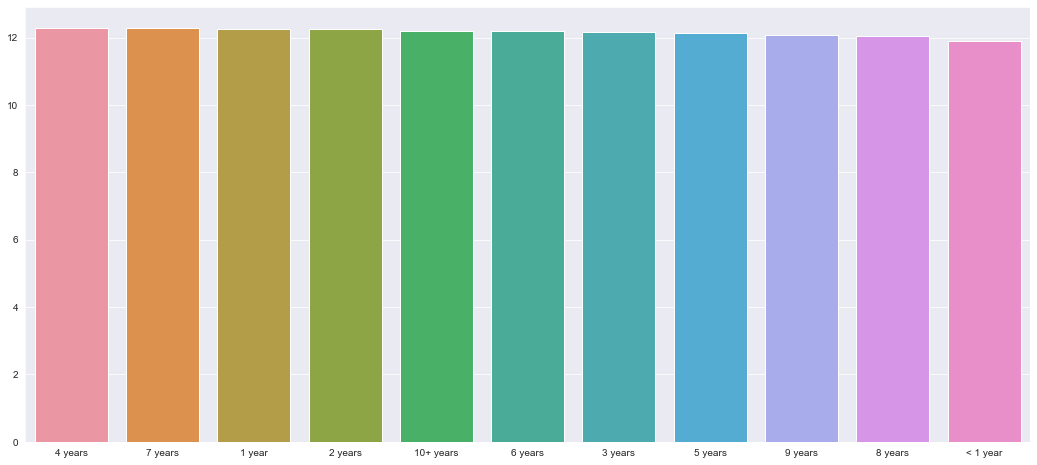

In [62]:
plt.figure(figsize=(18,8))
sns.barplot(x='emp_length', y='int_rate', data=df.groupby('emp_length')['int_rate'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

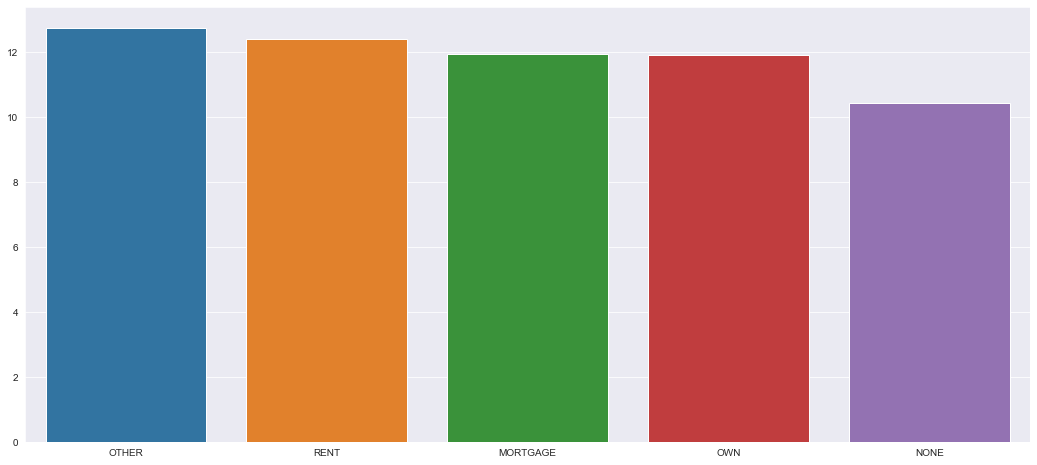

In [63]:
plt.figure(figsize=(18,8))
sns.barplot(x='home_ownership', y='int_rate', data=df.groupby('home_ownership')['int_rate'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

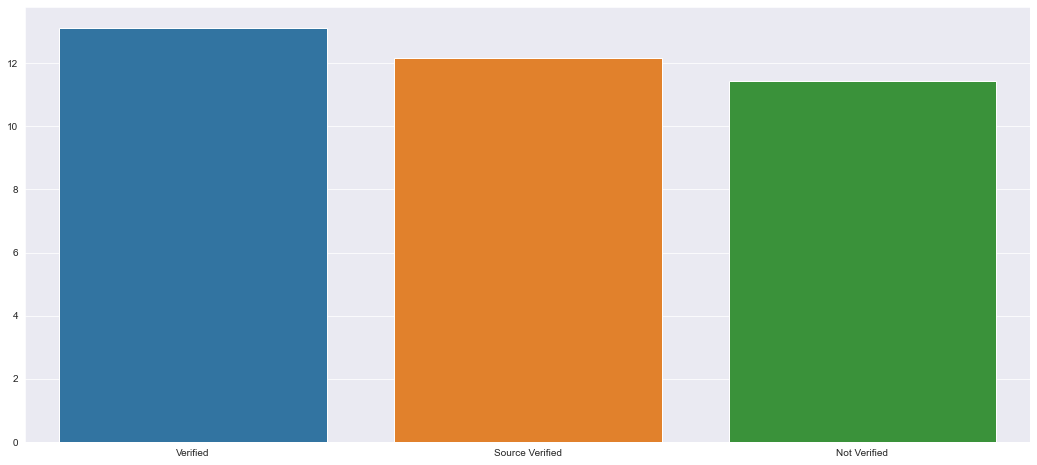

In [64]:
plt.figure(figsize=(18,8))
sns.barplot(x='verification_status', y='int_rate', data=df.groupby('verification_status')['int_rate'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

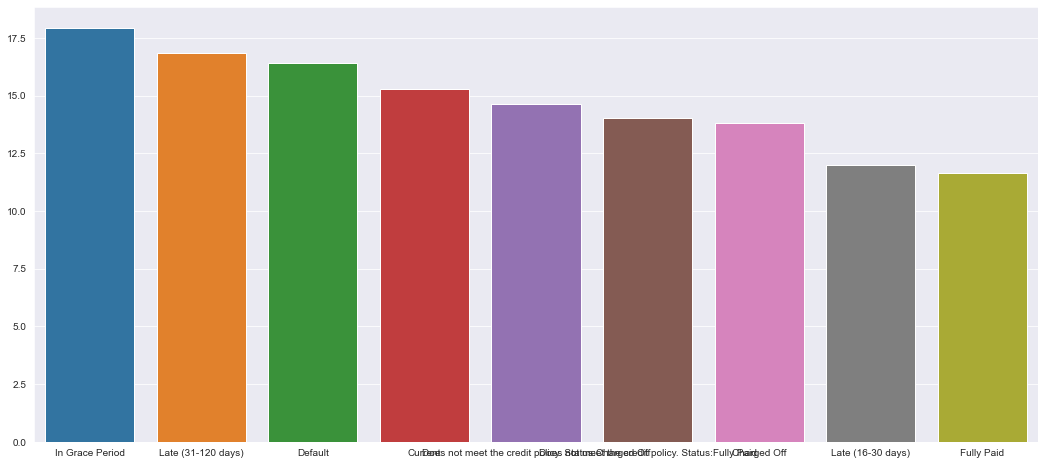

In [65]:
plt.figure(figsize=(18,8))
sns.barplot(x='loan_status', y='int_rate', data=df.groupby('loan_status')['int_rate'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

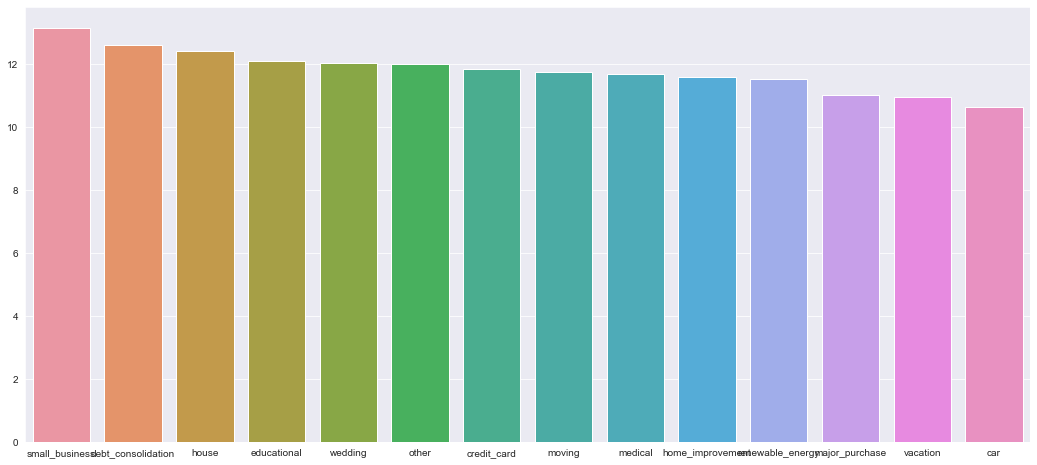

In [66]:
plt.figure(figsize=(18,8))
sns.barplot(x='purpose', y='int_rate', data=df.groupby('purpose')['int_rate'].mean().sort_values(ascending=False).reset_index())
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [67]:
for i in df.columns:
    if df[i].dtype!='object':
        print(i)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
annual_inc
dti
delinq_2yrs
fico_range_low
fico_range_high
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_amnt
last_fico_range_high
last_fico_range_low
pub_rec_bankruptcies


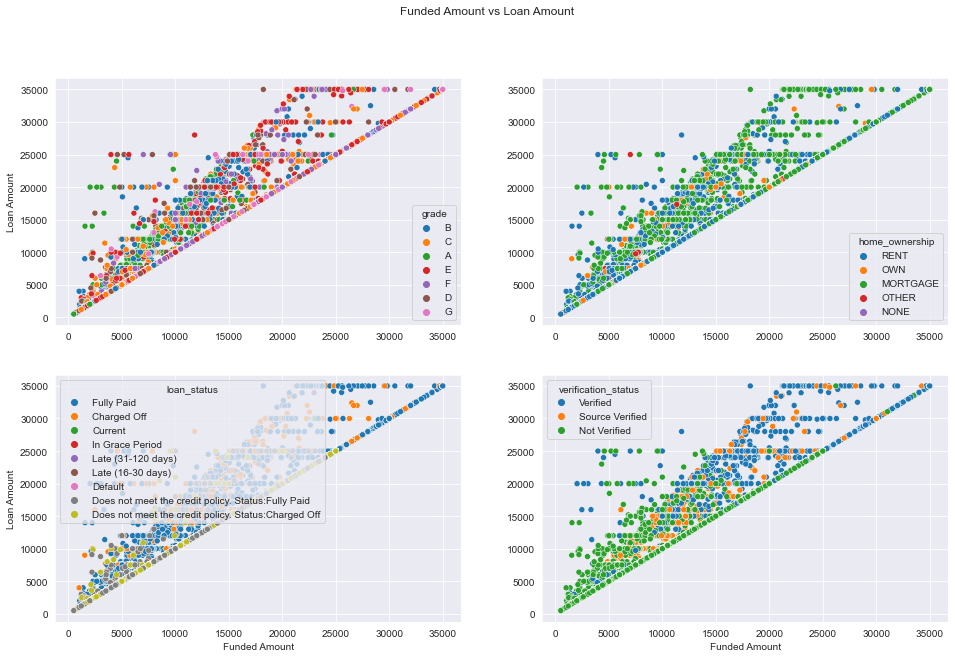

In [68]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.suptitle('Funded Amount vs Loan Amount')
sns.scatterplot(x='funded_amnt', y='loan_amnt', hue='grade', data=df)
plt.xlabel('')
plt.ylabel('Loan Amount')

plt.subplot(2,2,2)
sns.scatterplot(x='funded_amnt', y='loan_amnt', hue='home_ownership', data=df)
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,2,3)
sns.scatterplot(x='funded_amnt', y='loan_amnt', hue='loan_status', data=df)
plt.xlabel('Funded Amount')
plt.ylabel('Loan Amount')

plt.subplot(2,2,4)
sns.scatterplot(x='funded_amnt', y='loan_amnt', hue='verification_status', data=df)
plt.xlabel('Funded Amount')
plt.ylabel('')

plt.show()

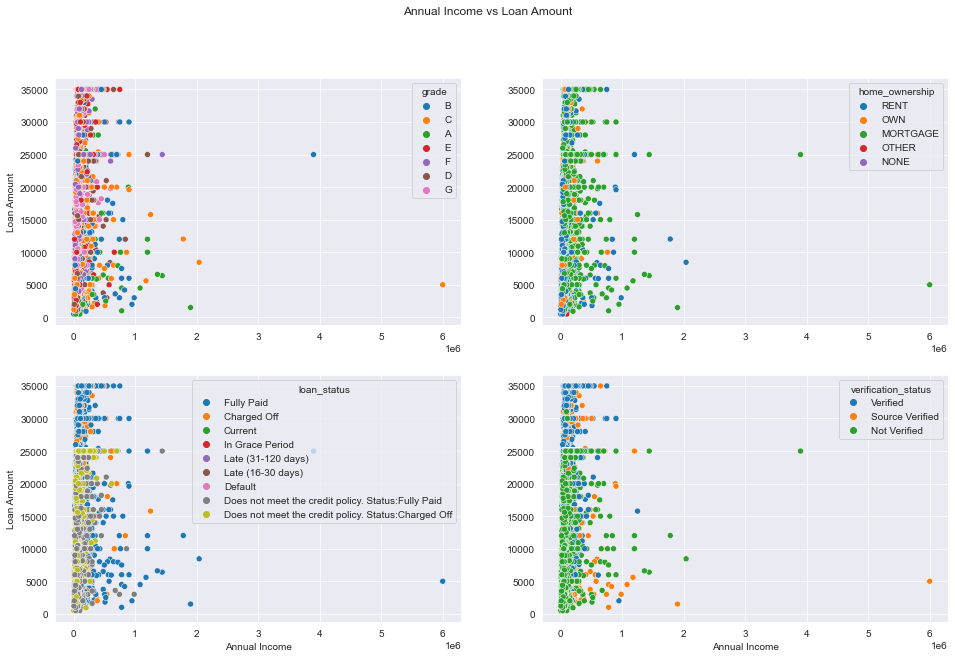

In [69]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.suptitle('Annual Income vs Loan Amount')
sns.scatterplot(x='annual_inc', y='loan_amnt', hue='grade', data=df)
plt.xlabel('')
plt.ylabel('Loan Amount')

plt.subplot(2,2,2)
sns.scatterplot(x='annual_inc', y='loan_amnt', hue='home_ownership', data=df)
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,2,3)
sns.scatterplot(x='annual_inc', y='loan_amnt', hue='loan_status', data=df)
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')

plt.subplot(2,2,4)
sns.scatterplot(x='annual_inc', y='loan_amnt', hue='verification_status', data=df)
plt.xlabel('Annual Income')
plt.ylabel('')

plt.show()

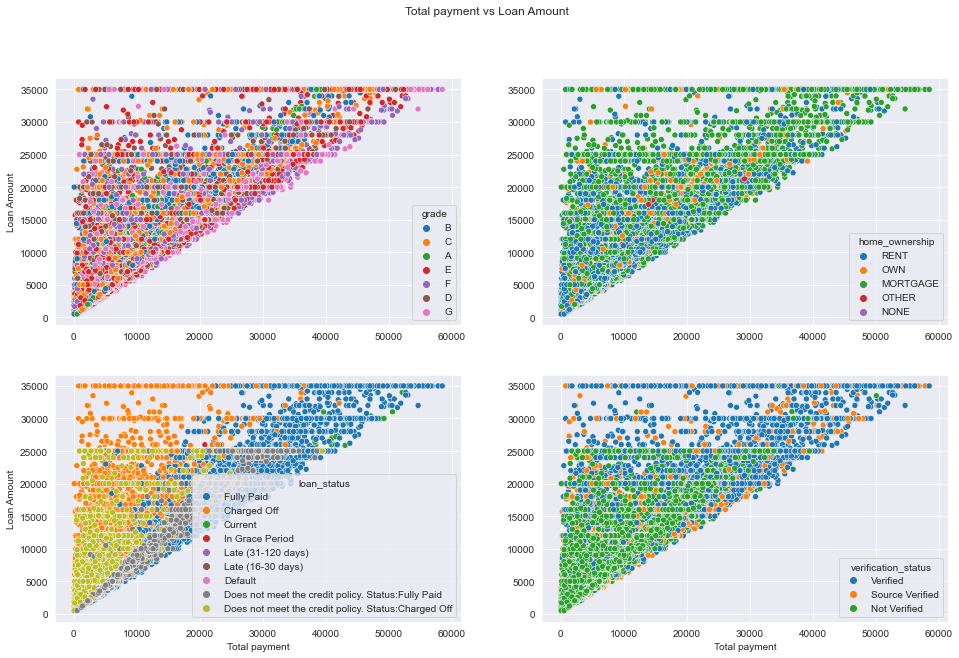

In [70]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.suptitle('Total payment vs Loan Amount')
sns.scatterplot(x='total_pymnt', y='loan_amnt', hue='grade', data=df)
plt.xlabel('')
plt.ylabel('Loan Amount')

plt.subplot(2,2,2)
sns.scatterplot(x='total_pymnt', y='loan_amnt', hue='home_ownership', data=df)
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,2,3)
sns.scatterplot(x='total_pymnt', y='loan_amnt', hue='loan_status', data=df)
plt.xlabel('Total payment')
plt.ylabel('Loan Amount')

plt.subplot(2,2,4)
sns.scatterplot(x='total_pymnt', y='loan_amnt', hue='verification_status', data=df)
plt.xlabel('Total payment')
plt.ylabel('')

plt.show()

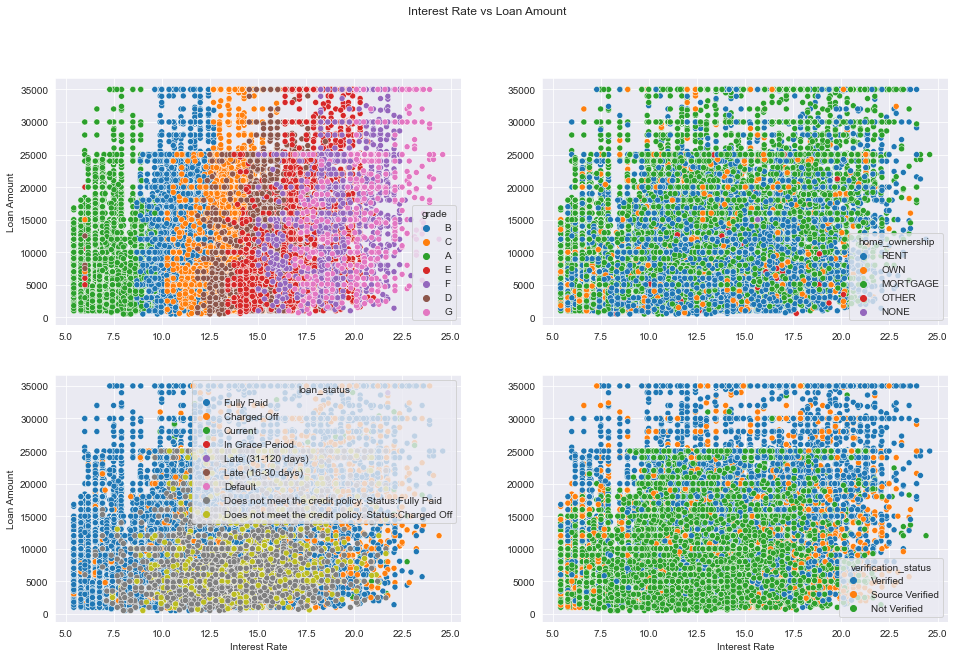

In [71]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.suptitle('Interest Rate vs Loan Amount')
sns.scatterplot(x='int_rate', y='loan_amnt', hue='grade', data=df)
plt.xlabel('')
plt.ylabel('Loan Amount')

plt.subplot(2,2,2)
sns.scatterplot(x='int_rate', y='loan_amnt', hue='home_ownership', data=df)
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,2,3)
sns.scatterplot(x='int_rate', y='loan_amnt', hue='loan_status', data=df)
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount')

plt.subplot(2,2,4)
sns.scatterplot(x='int_rate', y='loan_amnt', hue='verification_status', data=df)
plt.xlabel('Interest Rate')
plt.ylabel('')

plt.show()

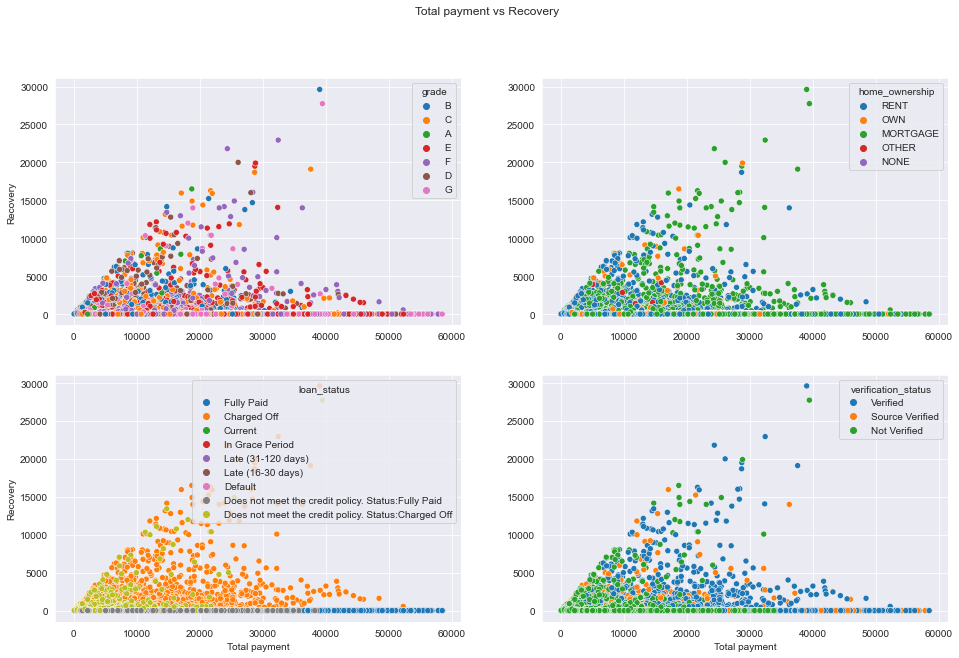

In [72]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.suptitle('Total payment vs Recovery')
sns.scatterplot(x='total_pymnt', y='recoveries', hue='grade', data=df)
plt.xlabel('')
plt.ylabel('Recovery')

plt.subplot(2,2,2)
sns.scatterplot(x='total_pymnt', y='recoveries', hue='home_ownership', data=df)
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,2,3)
sns.scatterplot(x='total_pymnt', y='recoveries', hue='loan_status', data=df)
plt.xlabel('Total payment')
plt.ylabel('Recovery')

plt.subplot(2,2,4)
sns.scatterplot(x='total_pymnt', y='recoveries', hue='verification_status', data=df)
plt.xlabel('Total payment')
plt.ylabel('')

plt.show()

In [90]:
for i in df.columns:
    if df[i].dtype!='object':
        print(i)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
annual_inc
issue_d
dti
delinq_2yrs
fico_range_low
fico_range_high
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
last_credit_pull_d
last_fico_range_high
last_fico_range_low
pub_rec_bankruptcies


In [74]:
date_col=['issue_d','last_pymnt_d','last_credit_pull_d']

In [75]:
for i in date_col:
    df[i] = pd.to_datetime(df[i])

In [76]:
for i in df.columns:
    if df[i].dtype=='datetime64[ns]':
        print(i)

issue_d
last_pymnt_d
last_credit_pull_d


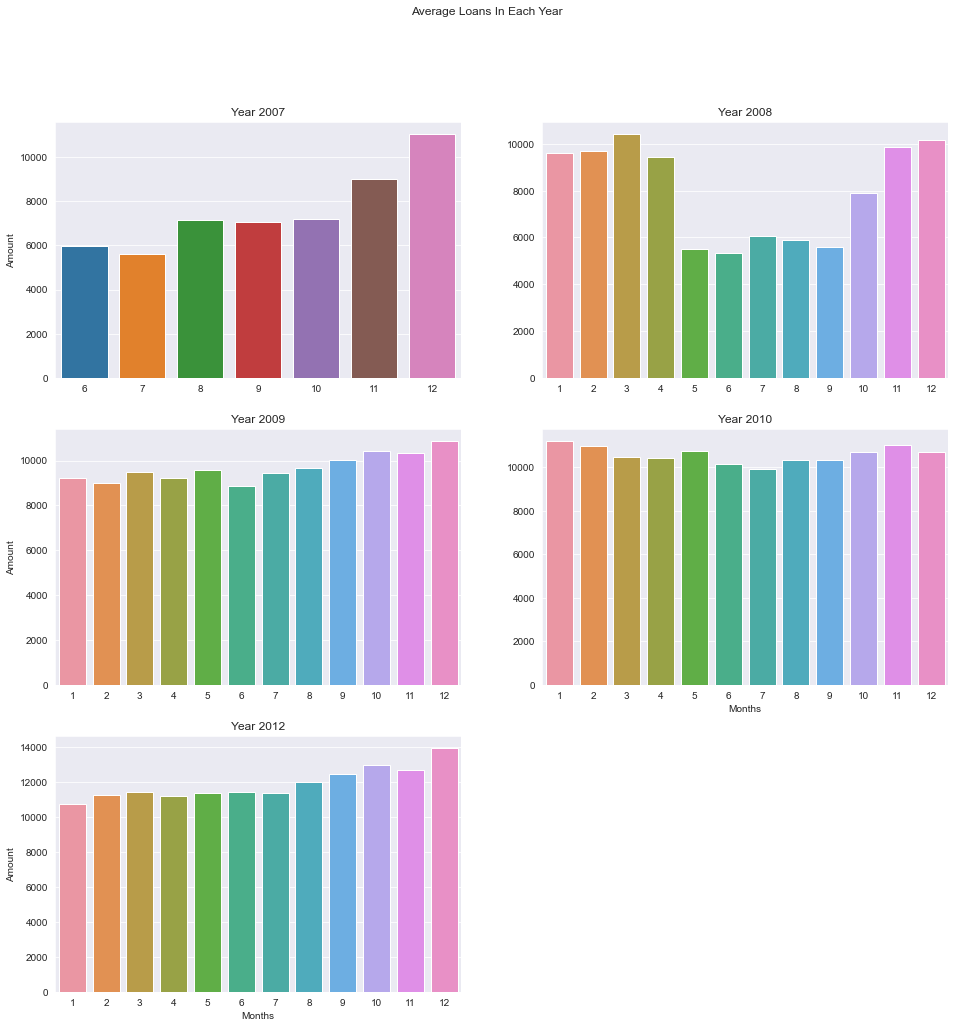

In [78]:
plt.figure(figsize=(16,16))

plt.subplot(3,2,1)
plt.suptitle('Average Loans In Each Year')
sns.barplot(x='issue_d', y='loan_amnt', data=df[df['issue_d'].dt.year==2007].groupby(df['issue_d'].dt.month)['loan_amnt'].mean().reset_index())
plt.title('Year 2007')
plt.xlabel('')
plt.ylabel('Amount')

plt.subplot(3,2,2)
sns.barplot(x='issue_d', y='loan_amnt', data=df[df['issue_d'].dt.year==2008].groupby(df['issue_d'].dt.month)['loan_amnt'].mean().reset_index())
plt.title('Year 2008')
plt.xlabel('')
plt.ylabel('')

plt.subplot(3,2,3)
sns.barplot(x='issue_d', y='loan_amnt', data=df[df['issue_d'].dt.year==2009].groupby(df['issue_d'].dt.month)['loan_amnt'].mean().reset_index())
plt.title('Year 2009')
plt.xlabel('')
plt.ylabel('Amount')

plt.subplot(3,2,4)
sns.barplot(x='issue_d', y='loan_amnt', data=df[df['issue_d'].dt.year==2010].groupby(df['issue_d'].dt.month)['loan_amnt'].mean().reset_index())
plt.title('Year 2010')
plt.xlabel('Months')
plt.ylabel('')

plt.subplot(3,2,5)
sns.barplot(x='issue_d', y='loan_amnt', data=df[df['issue_d'].dt.year==2011].groupby(df['issue_d'].dt.month)['loan_amnt'].mean().reset_index())
plt.title('Year 2012')
plt.xlabel('Months')
plt.ylabel('Amount')

plt.show()

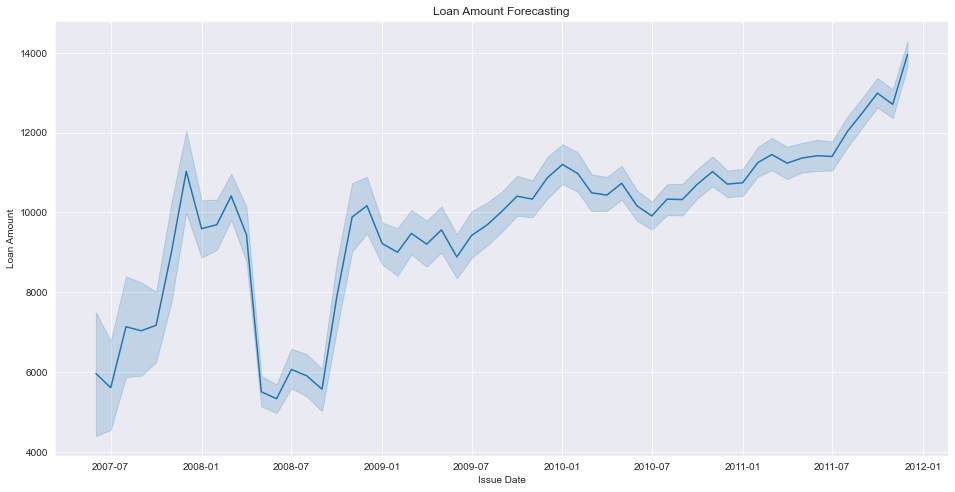

In [79]:
plt.figure(figsize=(16,8))
sns.lineplot(x='issue_d', y='loan_amnt', data=df)
plt.title('Loan Amount Forecasting')
plt.xlabel('Issue Date')
plt.ylabel('Loan Amount')
plt.show()

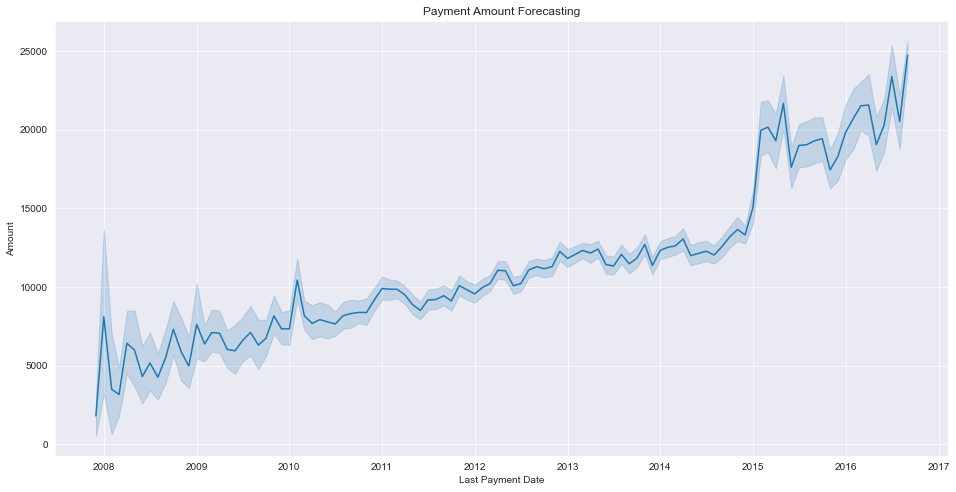

In [80]:
plt.figure(figsize=(16,8))
sns.lineplot(x='last_pymnt_d', y='total_pymnt', data=df)
plt.title('Payment Amount Forecasting')
plt.xlabel('Last Payment Date')
plt.ylabel('Amount')
plt.show()

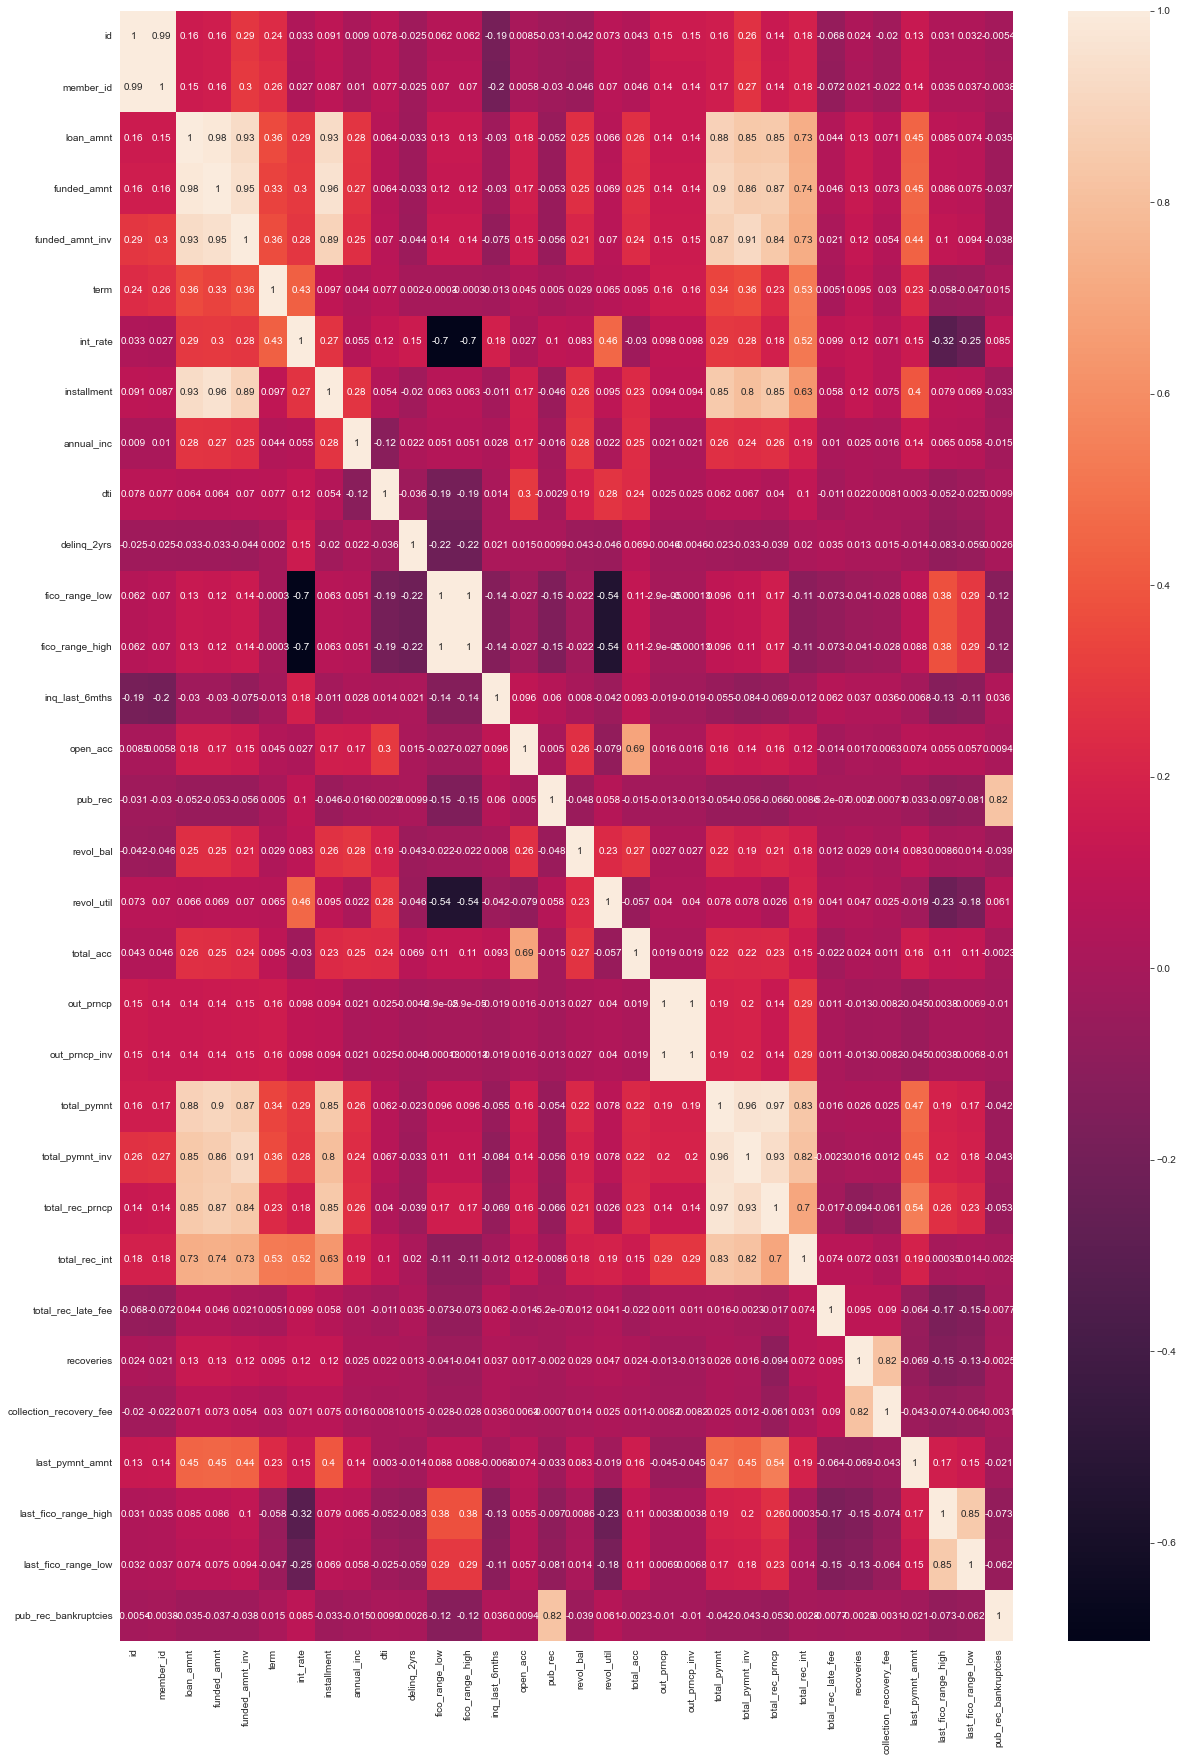

In [91]:
plt.figure(figsize=(20,30))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [82]:
df.to_csv('ml_new')